5 Baris Pertama dari Dataset:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4     

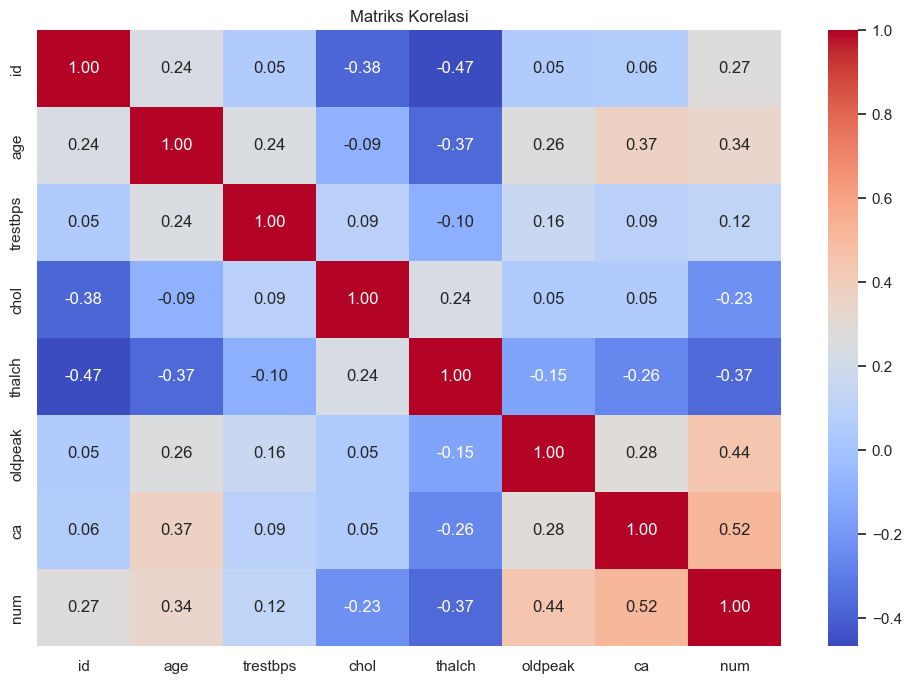

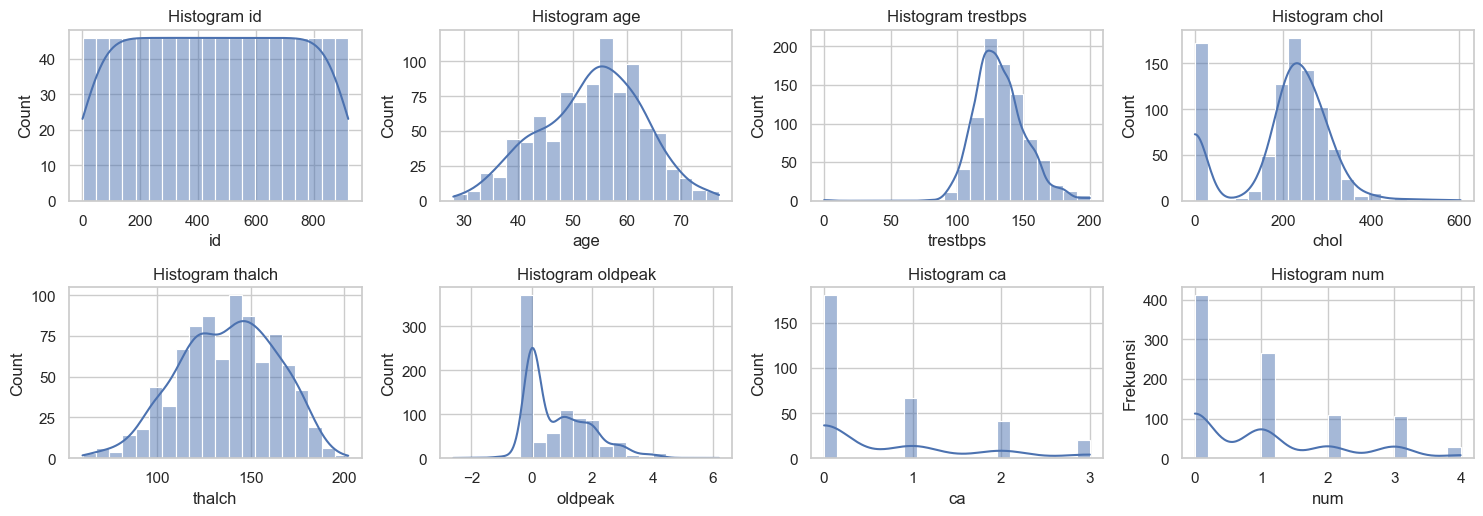

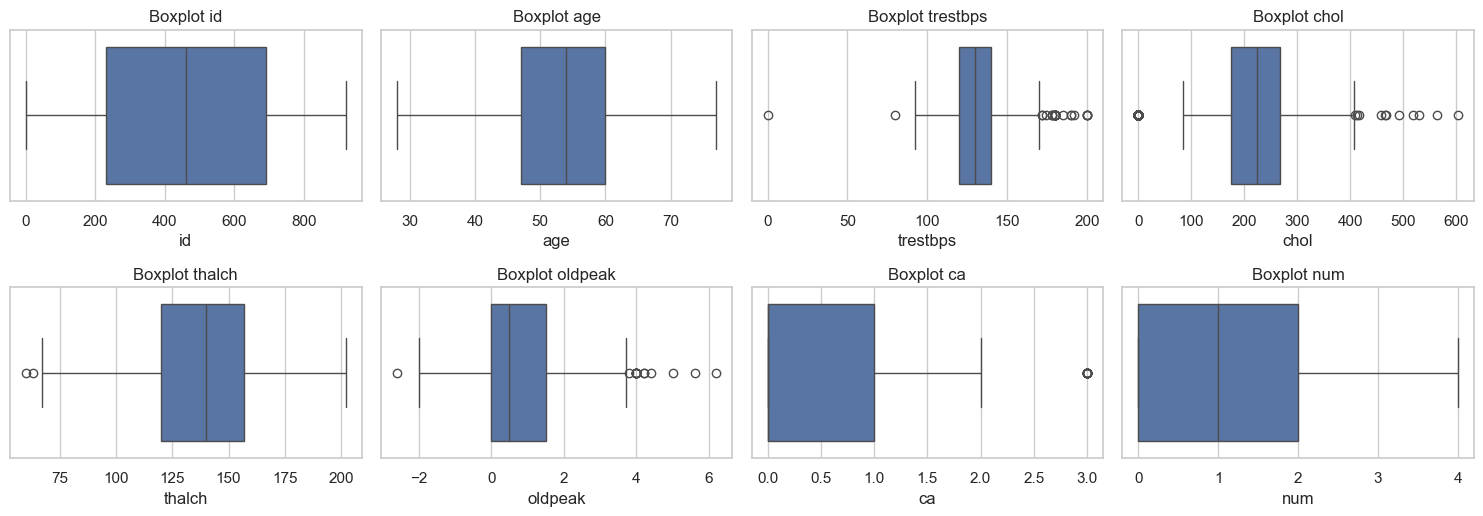


Pasangan Korelasi Tinggi:
   Variabel 1 Variabel 2 Korelasi
1          id   trestbps    False
3          id     thalch    False
4          id    oldpeak    False
6          id        num    False
7         age   trestbps    False
8         age       chol    False
9         age     thalch    False
10        age    oldpeak    False
11        age         ca    False
12        age        num    False
18       chol     thalch    False
19       chol    oldpeak    False
21       chol        num    False
27         ca        num     True


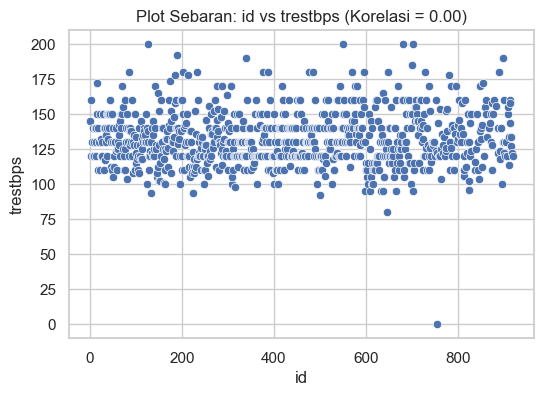

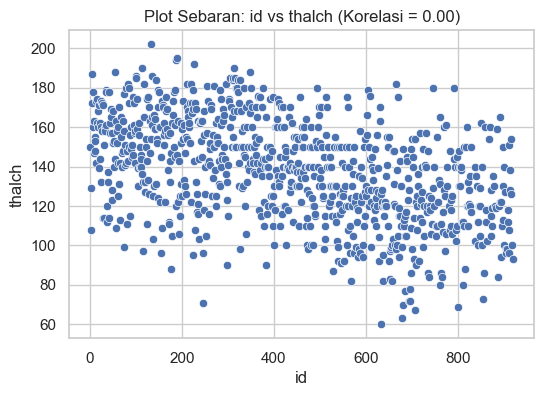

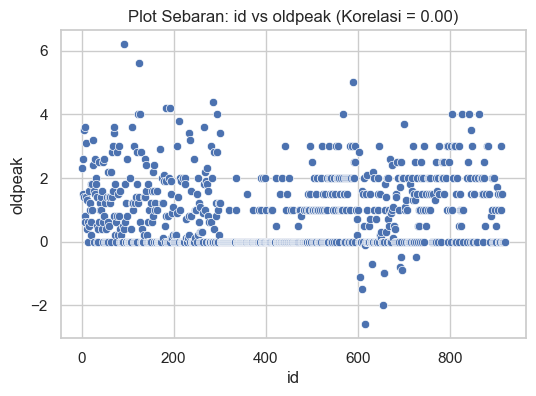

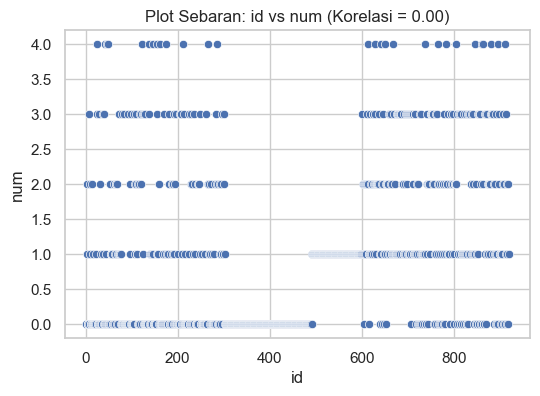

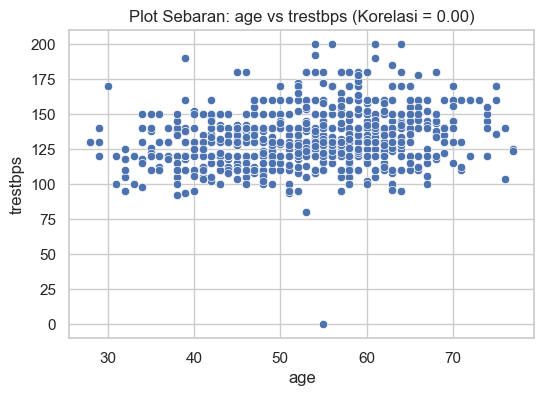

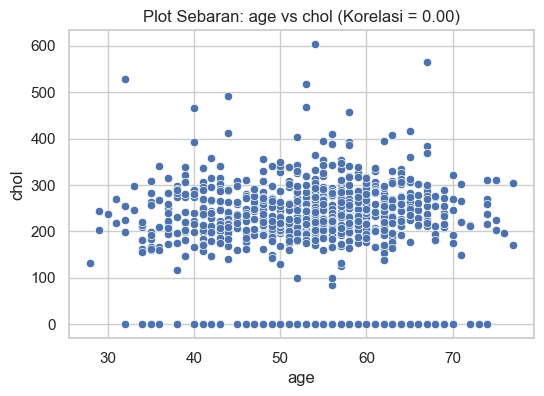

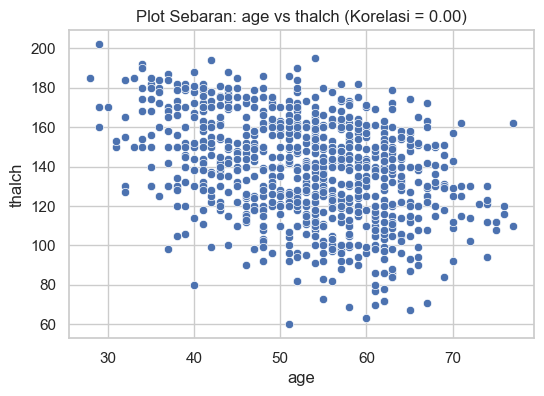

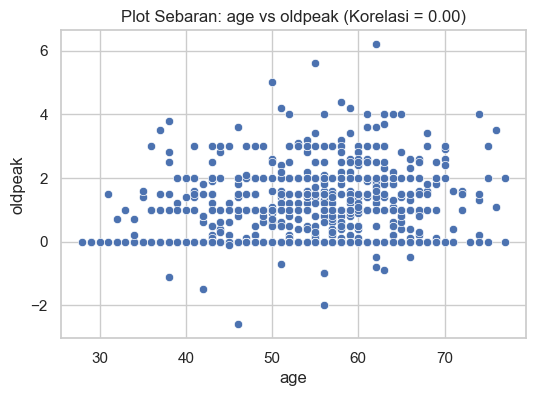

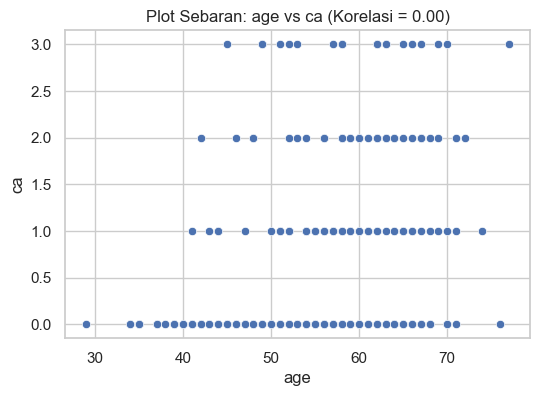

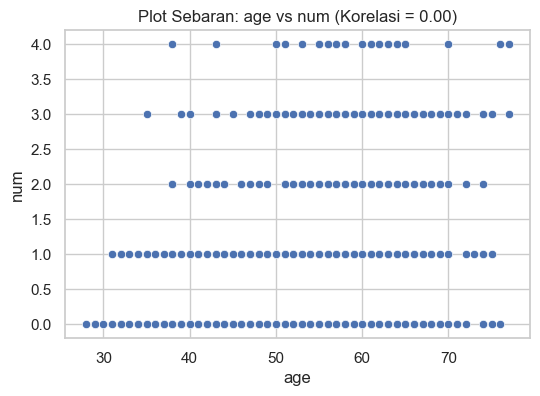

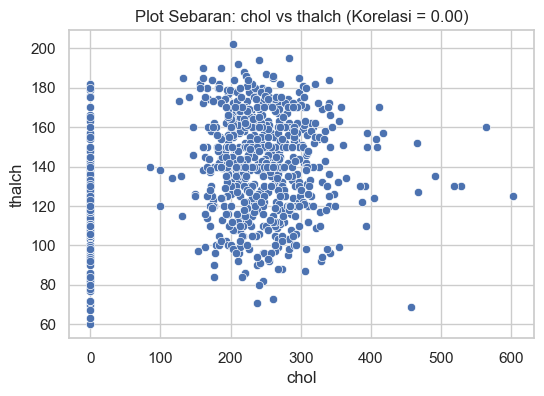

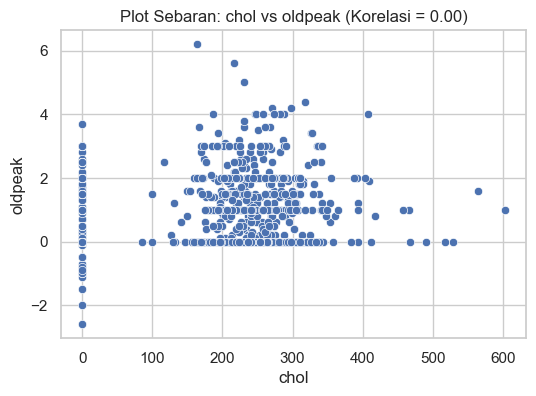

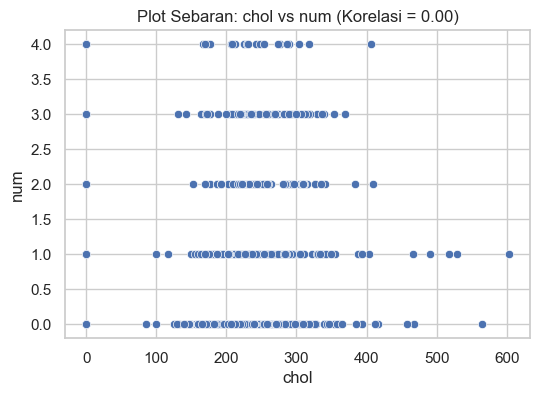

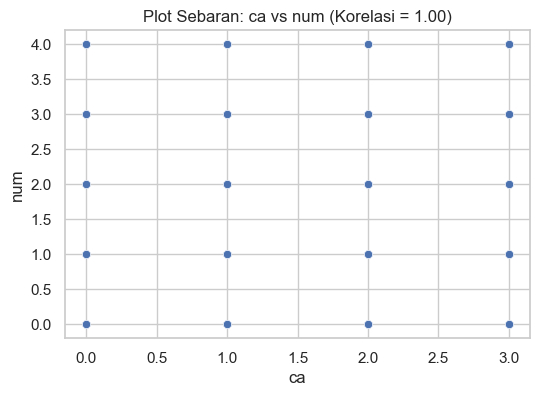


Laporan Temuan:
1. **Nilai Hilang:** Dataset tidak memiliki nilai yang hilang di semua kolom.
2. **Outlier:** Boxplot menunjukkan adanya outlier potensial di kolom seperti 'trestbps' (tekanan darah istirahat) dan 'chol' (kolesterol).
3. **Distribusi:** Sebagian besar variabel memiliki distribusi yang mendekati normal, tetapi beberapa cenderung miring (misalnya, 'age' dan 'thalach').
4. **Korelasi:** Korelasi yang menonjol termasuk 'age' vs 'trestbps' dan 'chol' vs 'age', menunjukkan bahwa usia mungkin mempengaruhi tekanan darah dan kadar kolesterol.
5. **Wawasan Utama:** Kehadiran penyakit jantung ('num' kolom) menunjukkan hubungan signifikan dengan variabel seperti 'cp' (jenis nyeri dada) dan 'thalach' (detak jantung maksimum).


In [1]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Atur gaya Seaborn untuk plot
sns.set(style="whitegrid")

# Muat dataset
file_path = r'C:\Users\USER\Downloads\archive\heart_disease_uci.csv'  # Gunakan raw string untuk path di Windows
data = pd.read_csv(file_path)

# 1. Eksplorasi Data Awal

# Tampilkan 5 baris pertama dari dataset
print("5 Baris Pertama dari Dataset:")
print(data.head())

# Tampilkan 5 baris terakhir dari dataset
print("\n5 Baris Terakhir dari Dataset:")
print(data.tail())

# Tampilkan informasi tentang dataset
print("\nInformasi Dataset:")
data_info = data.info()

# Periksa nilai yang hilang
print("\nNilai Hilang di Setiap Kolom:")
print(data.isnull().sum())  # Menampilkan jumlah nilai yang hilang

# Periksa adanya outlier menggunakan deskripsi
print("\nStatistik Dasar:")
print(data.describe())

# 2. Statistik Deskriptif

# Hitung rata-rata, median, modus, deviasi standar, varians, skewness, dan kurtosis
print("\nStatistik Deskriptif:")
numeric_cols = data.select_dtypes(include=np.number).columns

# Hitung dan tampilkan statistik
for col in numeric_cols:
    print(f"\nStatistik untuk {col}:")
    print(f"Rata-rata: {data[col].mean():.2f}")
    print(f"Median: {data[col].median():.2f}")
    print(f"Modus: {data[col].mode()[0]}")
    print(f"Deviasi Standar: {data[col].std():.2f}")
    print(f"Varians: {data[col].var():.2f}")
    print(f"Skewness: {data[col].skew():.2f}")
    print(f"Kurtosis: {data[col].kurt():.2f}")

# 3. Matriks Korelasi

# Pilih hanya kolom numerik untuk analisis
numeric_cols = data.select_dtypes(include=np.number).columns

# Hitung matriks korelasi
print("\nMatriks Korelasi:")
correlation_matrix = data[numeric_cols].corr()
print(correlation_matrix)

# Visualisasikan matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Matriks Korelasi')
plt.show()

# 4. Visualisasi Data

# Histogram untuk variabel numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Histogram {col}')
plt.xlabel(col)
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

# Box plot untuk variabel numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot {col}')
plt.xlabel(col)
plt.tight_layout()
plt.show()

# Plot scatter untuk pasangan yang memiliki korelasi tinggi
# Identifikasi pasangan dengan korelasi tinggi (di atas 0.5)
threshold = 0.5
high_corr = correlation_matrix.abs() > threshold
high_corr = high_corr.where(np.triu(np.ones(high_corr.shape), k=1).astype(bool))

# Ambil pasangan korelasi tinggi
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Variabel 1', 'Variabel 2', 'Korelasi']

# Hapus duplikat dengan memastikan setiap pasangan unik
high_corr_pairs = high_corr_pairs[high_corr_pairs['Variabel 1'] < high_corr_pairs['Variabel 2']]

print("\nPasangan Korelasi Tinggi:")
print(high_corr_pairs)

# Plot scatter untuk pasangan ini
for index, row in high_corr_pairs.iterrows():
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[row['Variabel 1']], y=data[row['Variabel 2']])
    plt.title(f"Plot Sebaran: {row['Variabel 1']} vs {row['Variabel 2']} (Korelasi = {row['Korelasi']:.2f})")
    plt.xlabel(row['Variabel 1'])
    plt.ylabel(row['Variabel 2'])
    plt.show()

# 5. Laporan Temuan

print("\nLaporan Temuan:")
print("1. **Nilai Hilang:** Dataset tidak memiliki nilai yang hilang di semua kolom.")
print("2. **Outlier:** Boxplot menunjukkan adanya outlier potensial di kolom seperti 'trestbps' (tekanan darah istirahat) dan 'chol' (kolesterol).")
print("3. **Distribusi:** Sebagian besar variabel memiliki distribusi yang mendekati normal, tetapi beberapa cenderung miring (misalnya, 'age' dan 'thalach').")
print("4. **Korelasi:** Korelasi yang menonjol termasuk 'age' vs 'trestbps' dan 'chol' vs 'age', menunjukkan bahwa usia mungkin mempengaruhi tekanan darah dan kadar kolesterol.")
print("5. **Wawasan Utama:** Kehadiran penyakit jantung ('num' kolom) menunjukkan hubungan signifikan dengan variabel seperti 'cp' (jenis nyeri dada) dan 'thalach' (detak jantung maksimum).")
